In [1]:
from keras import layers
from keras import models

C:\Users\yueki\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
################
### SETTINGS ###
################

# Data directoriy
base_dir = ".\\data\\multi4"
train_dir = base_dir + "\\train"
validation_dir = base_dir + "\\validation"
test_dir = base_dir + "\\test"

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#model.add(layers.Dense(1,activation='sigmoid'))
model.add(layers.Dense(4,activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
    #class_mode ='categorical'
    
)


Found 2658 images belonging to 4 classes.
Found 1510 images belonging to 4 classes.


In [7]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                              validation_steps=40
                             )

Epoch 1/30
100/100 [==============================] - 208s 2s/step - loss: 1.1860 - acc: 0.4600 - val_loss: 0.9418 - val_acc: 0.5138
Epoch 2/30
 99/100 [============================>.] - ETA: 1s - loss: 0.8571 - acc: 0.5660

C:\Users\yueki\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 208s 2s/step - loss: 0.8548 - acc: 0.5673 - val_loss: 0.7936 - val_acc: 0.5759
Epoch 3/30
100/100 [==============================] - 193s 2s/step - loss: 0.7251 - acc: 0.6281 - val_loss: 0.9369 - val_acc: 0.5963
Epoch 4/30
100/100 [==============================] - 201s 2s/step - loss: 0.6895 - acc: 0.6622 - val_loss: 1.3170 - val_acc: 0.5228
Epoch 5/30
100/100 [==============================] - 216s 2s/step - loss: 0.6271 - acc: 0.6755 - val_loss: 0.7033 - val_acc: 0.6938
Epoch 6/30
100/100 [==============================] - 201s 2s/step - loss: 0.5879 - acc: 0.6981 - val_loss: 0.8210 - val_acc: 0.6671
Epoch 7/30
100/100 [==============================] - 161s 2s/step - loss: 0.5546 - acc: 0.7383 - val_loss: 0.7785 - val_acc: 0.6638
Epoch 8/30
100/100 [==============================] - 139s 1s/step - loss: 0.5131 - acc: 0.7524 - val_loss: 0.8072 - val_acc: 0.7266
Epoch 9/30
100/100 [==============================] - 155s 2s/step - loss: 0.474

In [8]:
model.save('cats_and_dogs_small_1_20201121_2.h5')

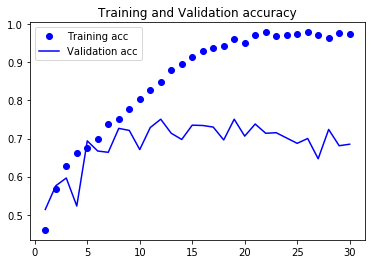

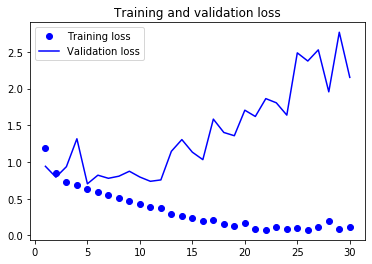

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc) + 1)

# plot ratio
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1400 images belonging to 4 classes.
test acc: 0.7099999964237214
